<a href="https://colab.research.google.com/github/The-Godfatherr/LAB-AIML/blob/main/LAB_9_Abhinav_Verma_E23CSEU1335.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Download the dataset
url = "https://archive.ics.uci.edu/static/public/812/raisin+dataset.zip"

# Read the Excel file from the zip archive
data = pd.read_excel('/content/Raisin_Dataset.xlsx')

# Display first 5 rows
print(data.head())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  


In [ ]:
print(data.isnull().sum())
# Handle missing values if any (drop or impute)


Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


In [ ]:
data['Class'] = data['Class'].map({'Kecimen':0, 'Besni':1})


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select only feature columns
features = data.drop('Class', axis=1)
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
features = pd.DataFrame(features_scaled, columns=features.columns)

# Calculate feature importance (using DecisionTreeClassifier for example)
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(features, data['Class'])
importance = clf.feature_importances_

# Print importance and select important features
for f, imp in zip(features.columns, importance):
    print(f"{f}: {imp}")

# Discard least important features (set a threshold, e.g. 0.05)
important_features = [f for f, imp in zip(features.columns, importance) if imp > 0.05]
features = features[important_features]


Area: 0.02105906178714511
MajorAxisLength: 0.6063972794519744
MinorAxisLength: 0.03509371860491211
Eccentricity: 0.08920778313154877
ConvexArea: 0.04063125464672456
Extent: 0.07994892702137642
Perimeter: 0.12766197535631865


In [ ]:
# 2.	Split the dataset into 80% for training and rest 20% for testing (train_test_split function)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, data['Class'], test_size=0.2, random_state=42)


In [ ]:
#3.	Train DT classifier using built-in function on the training set with default parameters (sklearn.tree.DecisionTreeClassifier)
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# 4.	Evaluate the train model using testset with the help of confusion matrix, Accuracy, Precision and Recall.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
 [[79 15]
 [17 69]]
Accuracy: 0.82
Precision: 0.82
Recall: 0.80


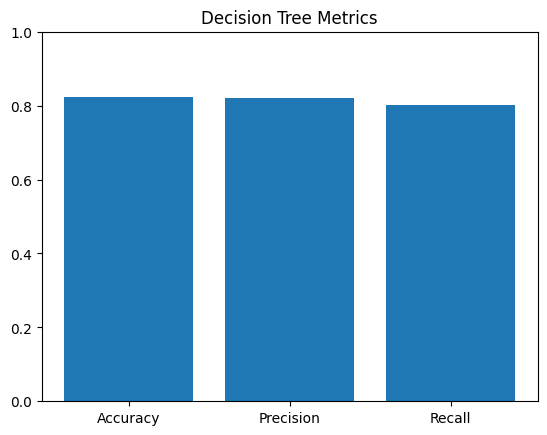

In [ ]:
# 5.	Compare the results (Accuracy, Precision and Recall) using suitable chart.
import matplotlib.pyplot as plt

scores = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}
plt.bar(scores.keys(), scores.values())
plt.title('Decision Tree Metrics')
plt.ylim(0, 1)
plt.show()


In [ ]:
######STANDARD SCALAR METHOD######
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 1a. Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00812/Raisin_Dataset.xlsx"
df = pd.read_excel('/content/Raisin_Dataset.xlsx')
print(df.head())  # Display first 5 rows

# 1b. Check for missing/null values
print(df.isnull().sum())  # Should all be zero for this dataset

# 1c. Convert class values to 0 and 1
df['Class'] = df['Class'].map({'Kecimen':0, 'Besni':1})

# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# 1d. Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1d. Check feature importance using Decision Tree
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_scaled, y)
importances = dtc.feature_importances_

#1E Print feature importances
for name, imp in zip(X.columns, importances):
    print(f"{name}: {imp:.3f}")


    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64
Area: 0.031
MajorAxisLength: 0.614
MinorAxisLength: 0.037
Eccentricity: 0.085
ConvexArea: 0.031
Extent: 0.078
Perimeter: 0.125


In [ ]:
threshold = 0.05  # You can adjust this threshold as needed
important_features = [name for name, imp in zip(X.columns, importances) if imp > threshold]
print(f"Selected important features: {important_features}")

# Select important features only
X_selected = df[important_features]
X_selected_scaled = scaler.fit_transform(X_selected)


Selected important features: ['MajorAxisLength', 'Eccentricity', 'Extent', 'Perimeter']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, y, test_size=0.2, random_state=42)


In [ ]:
dtc_selected = DecisionTreeClassifier(random_state=42)
dtc_selected.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

y_pred = dtc_selected.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
 [[79 15]
 [17 69]]
Accuracy: 0.82
Precision: 0.82
Recall: 0.80


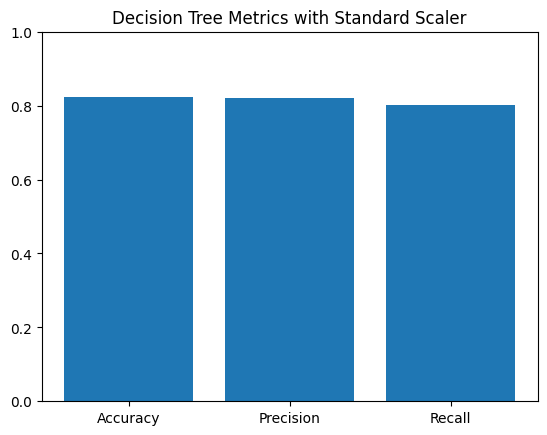

In [ ]:
import matplotlib.pyplot as plt

scores = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}
plt.bar(scores.keys(), scores.values())
plt.title('Decision Tree Metrics with Standard Scaler')
plt.ylim(0, 1)
plt.show()
